In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from bartpy.bartpy.sklearnmodel import SklearnModel
from tqdm import tqdm

from scipy.special import logit, expit
from scipy.stats import bernoulli

import simulate_data.simulate_data as sd

In [4]:
n=250

def get_posterior_samples_data(stem,nsamp,nburn,ntree,nchain,thin,alpha,beta,k):
    name = (
        stem +
    "all_runs_with_ps" +
    "_n_samples="+ str(nsamp) +
    "_n_burn=" + str(nburn) + 
    "_n_samples=" + str(nsamp) +
    "_n_trees=" + str(ntree) +
    "_n_chains=" + str(nchain) + 
    "_thin=" + str(thin) + 
    "_alpha=" + str(alpha) + 
    "_beta=" + str(beta) + 
    "_k=" + str(k) + ".npy"
    )
    return np.load(name)

In [5]:
# The Data

data = sd.make_zaidi_data_A(n)
Y=data["Y"]
W=data["W"]
X=data["X"]

tau=data["tau"]
pi=data["p"]

Y_i_star = sd.get_Y_i_star(Y,W,pi)

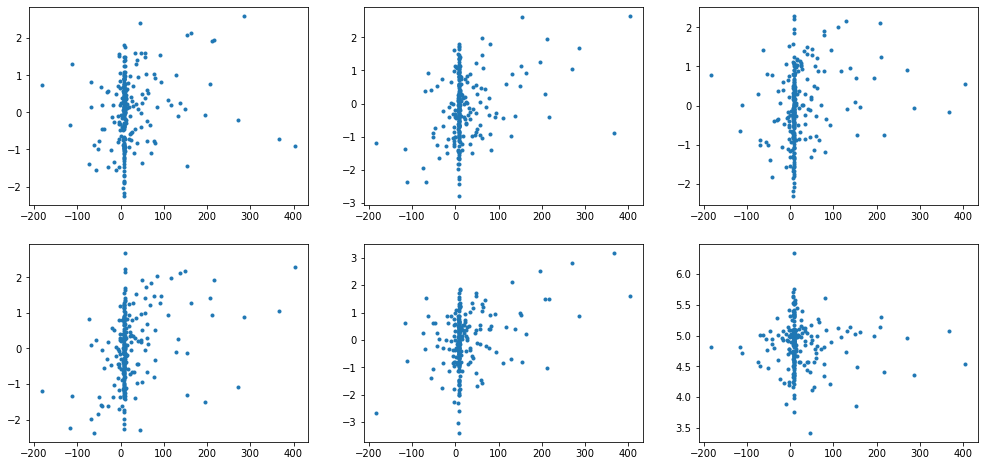

In [6]:
plt.figure(figsize=(17,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(Y, X[:,i], '.')

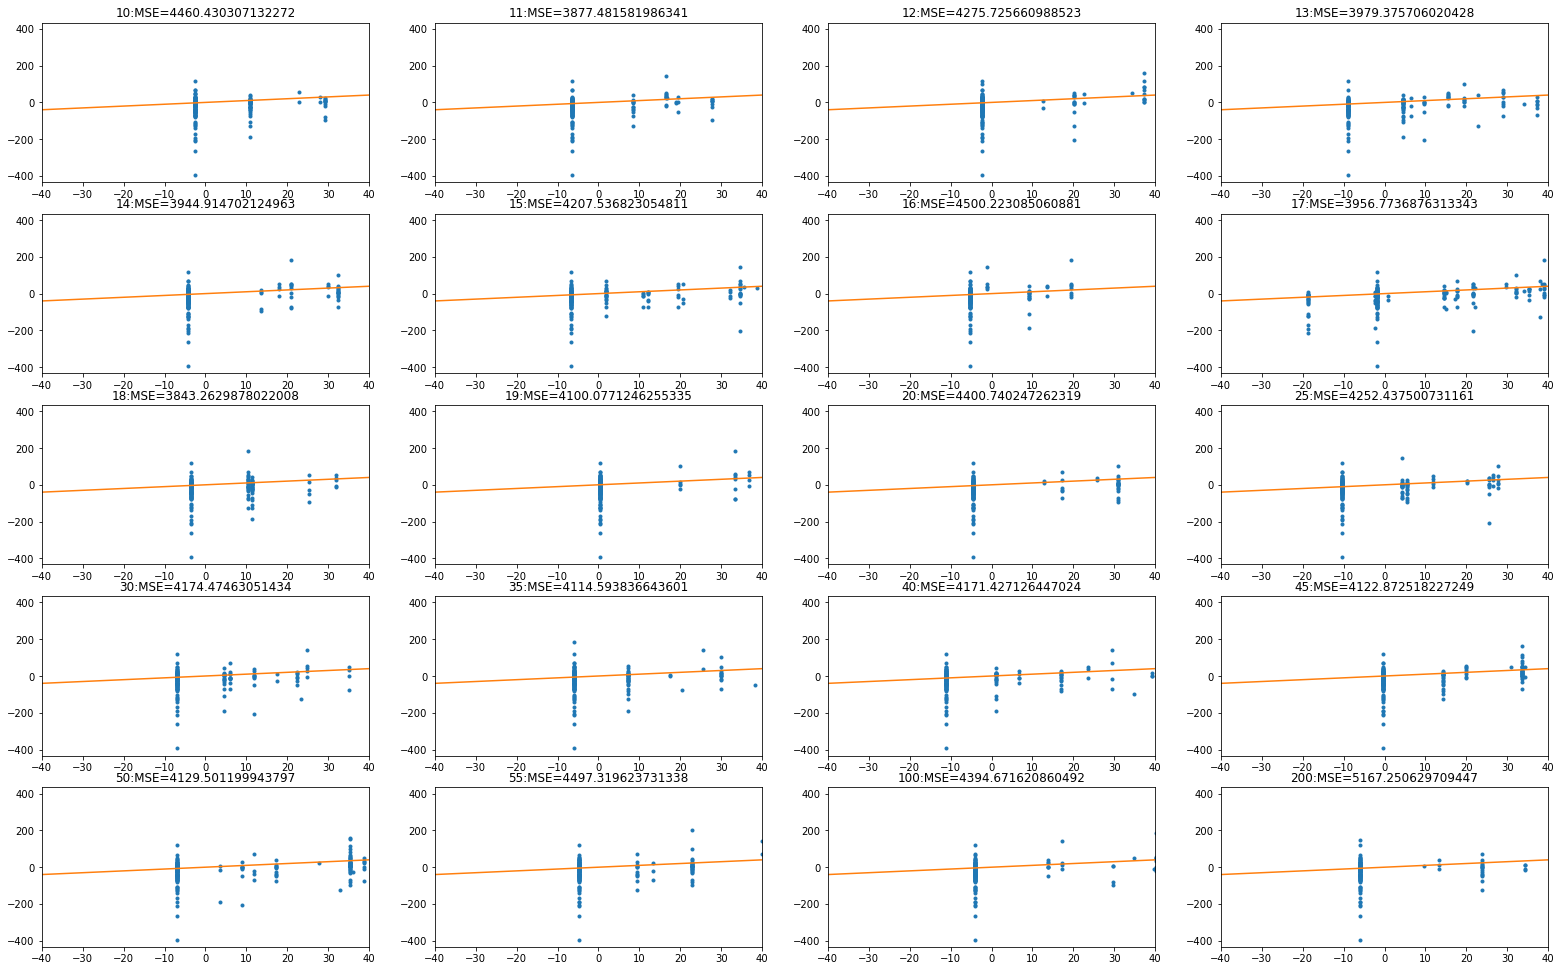

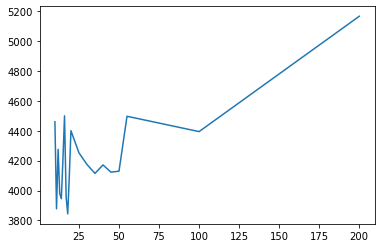

In [7]:
plt.figure(figsize=(27,17))
tree_count = [10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50,55,100,200]
mse_list = list()
for i in range(len(tree_count)):
    
    post_samples = sd.get_posterior_samples_data(
        stem="experiment_results/A/known/all_runs",
        nreps=1,
        nsamp=2000,
        nburn=2000,
        ntree=tree_count[i],
        nchain=4,
        thin=.1,
        alpha=0.95,
        beta=2.,
        k=2.0,
    )
    
    base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
    samp_df=pd.DataFrame(post_samples[:,:,0])
    CATE=np.mean(post_samples[:,:,0], axis=0)
    plt.subplot(5, 4, i+1)
    plt.plot(CATE, tau, '.')
    plt.plot(base, base)
    plt.xlim((-40,40))
    plt.title(
        str(tree_count[i])+
        ":MSE="+
        str(np.mean( (CATE-tau)**2))
    )
    mse_list.append(np.mean( (CATE-tau)**2))
plt.show()
plt.plot(tree_count,mse_list)

In [8]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=18,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=2.,
    k=2.0,
)
    
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)
    
min_CATE = np.min(CATE)
max_CATE = np.max(CATE)

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_results/A/known/_n_replications=1_n_samples=2000_n_burn=2000_n_trees=18_n_chains=4_thin=0.1_alpha=0.95_beta=2.0_k=2.0.npy'

In [ ]:
min_CATE_group = X[CATE==min_CATE,:]
nonmin_CATE_group = X[CATE!=min_CATE,:]

max_CATE_group = X[CATE==max_CATE,:]
nonmax_CATE_group = X[CATE!=max_CATE,:]

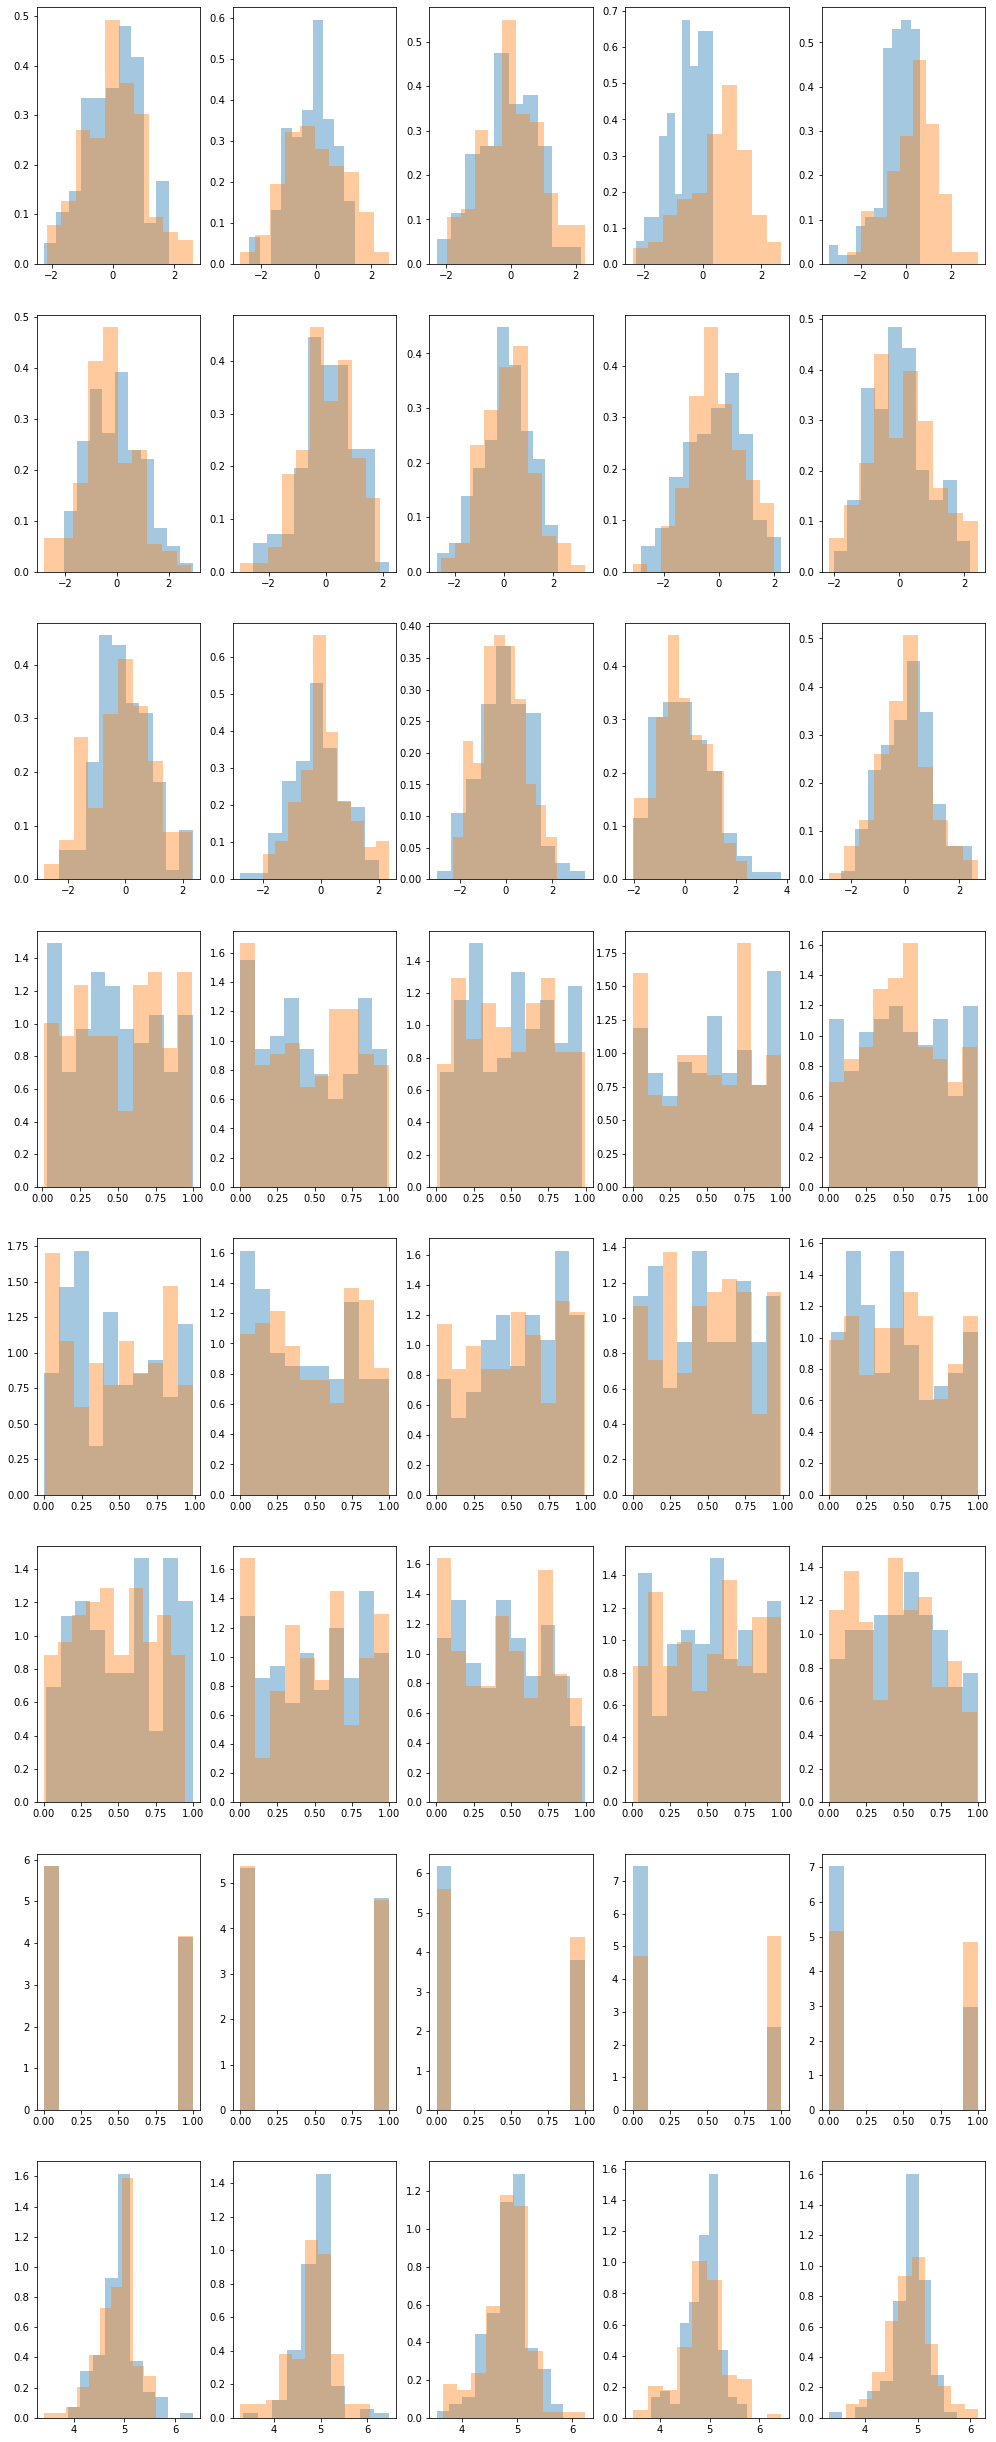

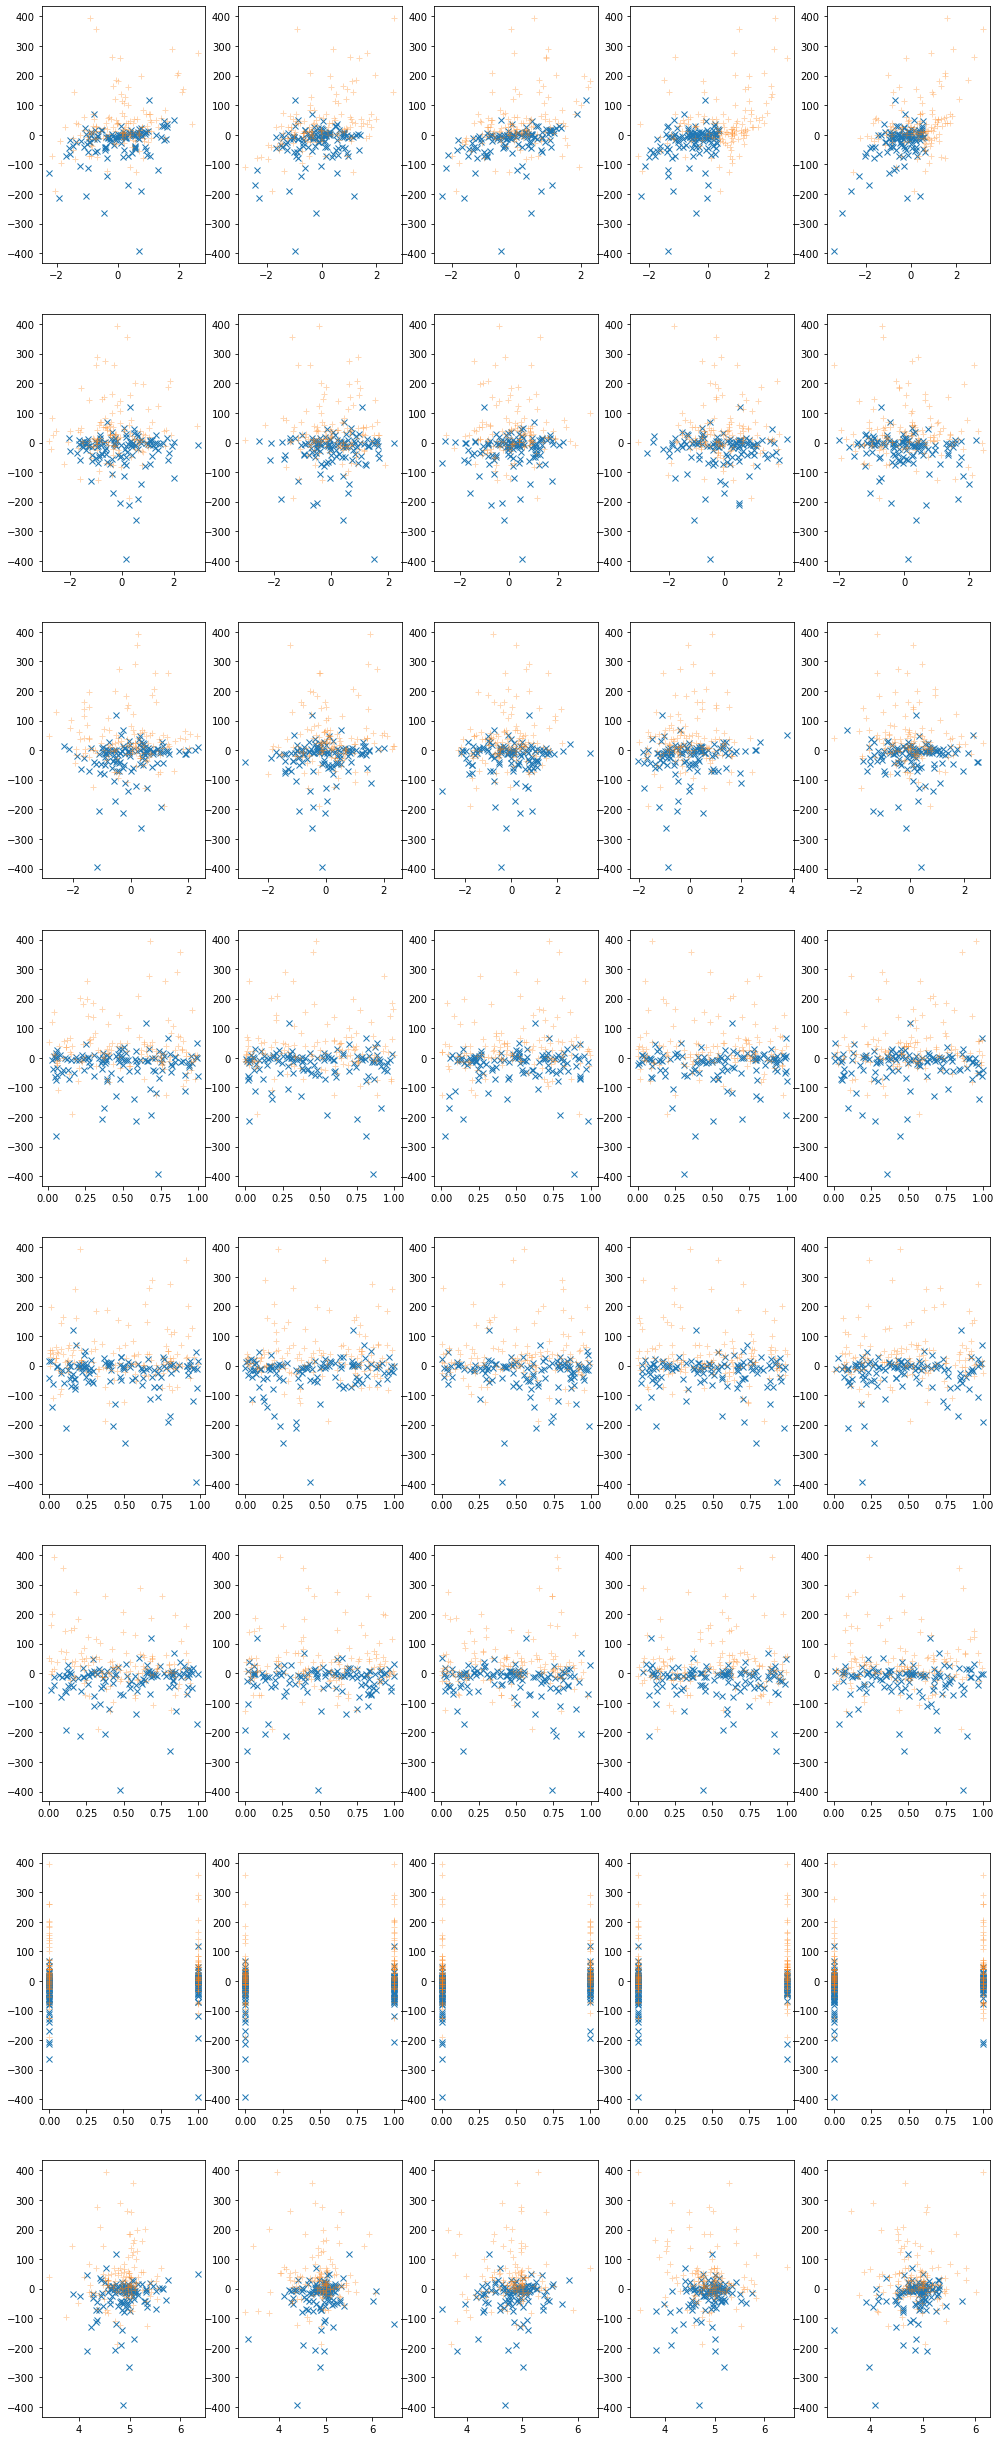

In [49]:
plt.figure(figsize=(17,50))
for i in range(min_CATE_group.shape[1]):
    plt.subplot(9, 5, i+1)
    _=plt.hist(min_CATE_group[:,i],alpha=.4, density=True)
    _=plt.hist(nonmin_CATE_group[:,i],alpha=.4, density=True)
plt.figure(figsize=(17,50))
for i in range(min_CATE_group.shape[1]):
    plt.subplot(9, 5, i+1)
    _=plt.plot(min_CATE_group[:,i], tau[CATE==min_CATE],"x")
    _=plt.plot(nonmin_CATE_group[:,i], tau[CATE>min_CATE],"+", alpha=.3)

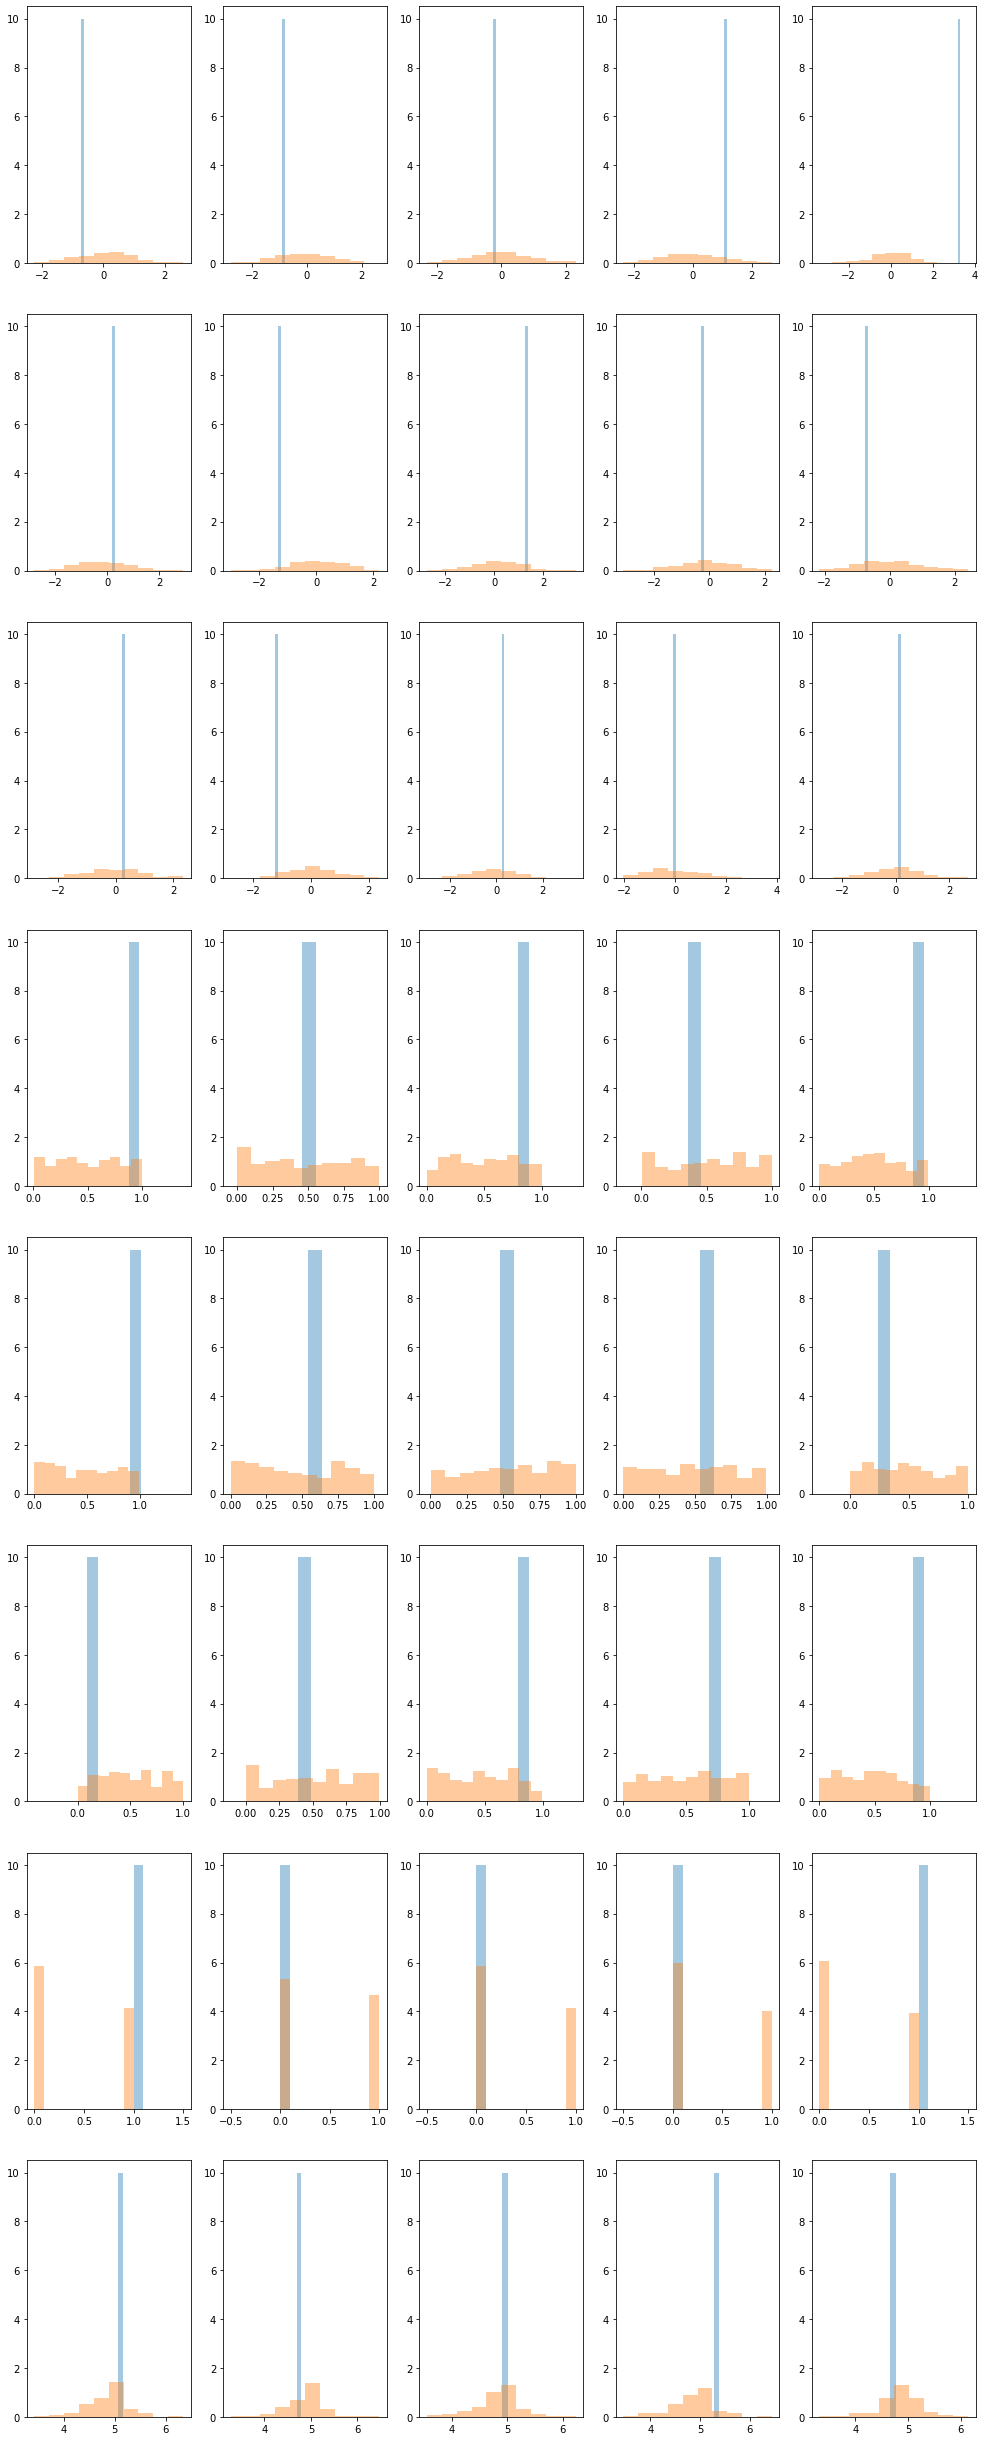

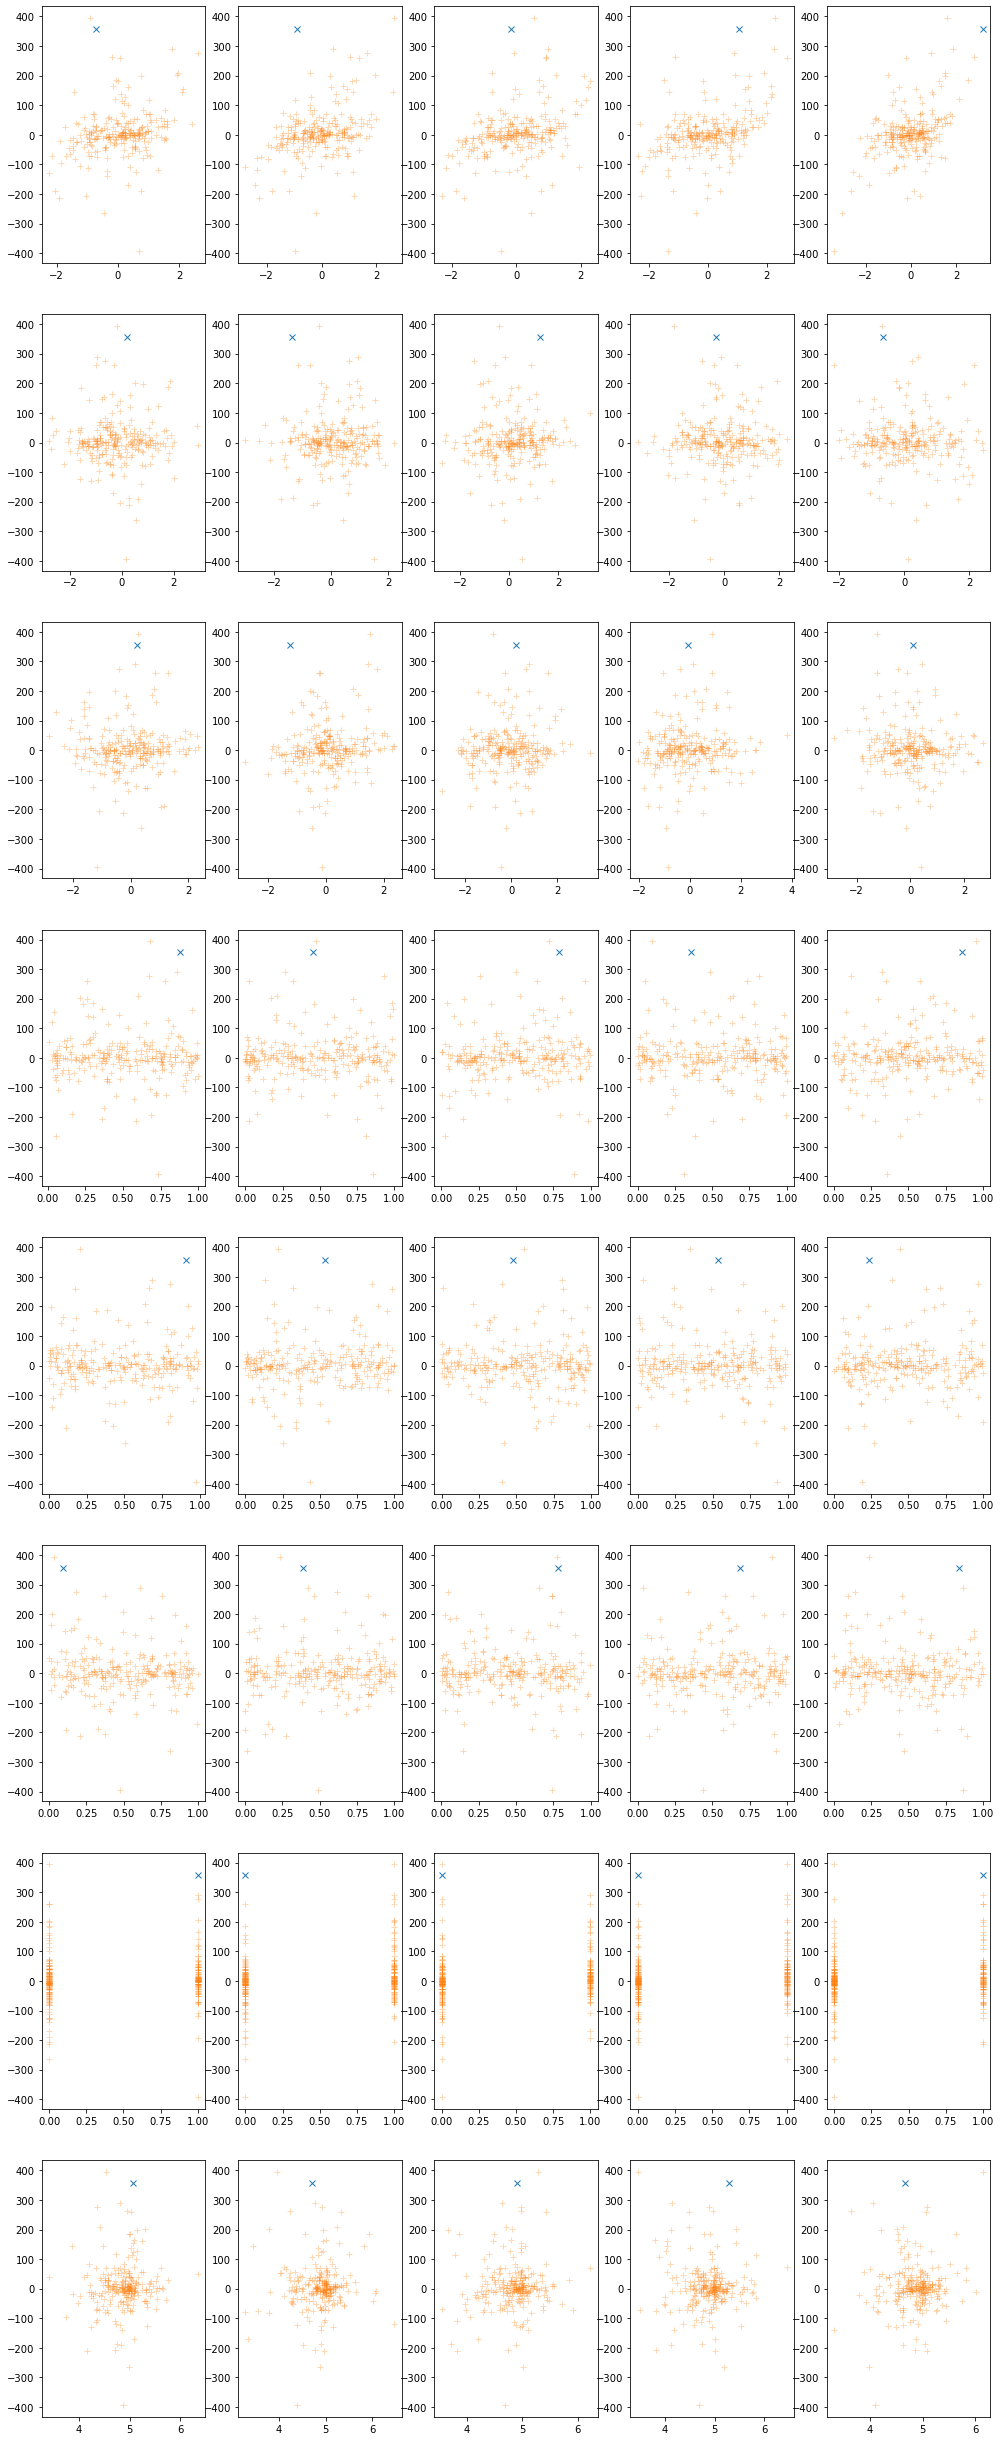

In [50]:
plt.figure(figsize=(17,50))
for i in range(max_CATE_group.shape[1]):
    plt.subplot(9, 5, i+1)
    _=plt.hist(max_CATE_group[:,i],alpha=.4, density=True)
    _=plt.hist(nonmax_CATE_group[:,i],alpha=.4, density=True)
plt.figure(figsize=(17,50))
for i in range(max_CATE_group.shape[1]):
    plt.subplot(9, 5, i+1)
    _=plt.plot(max_CATE_group[:,i], tau[CATE==max_CATE],"x")
    _=plt.plot(nonmax_CATE_group[:,i], tau[CATE<max_CATE],"+", alpha=.3)

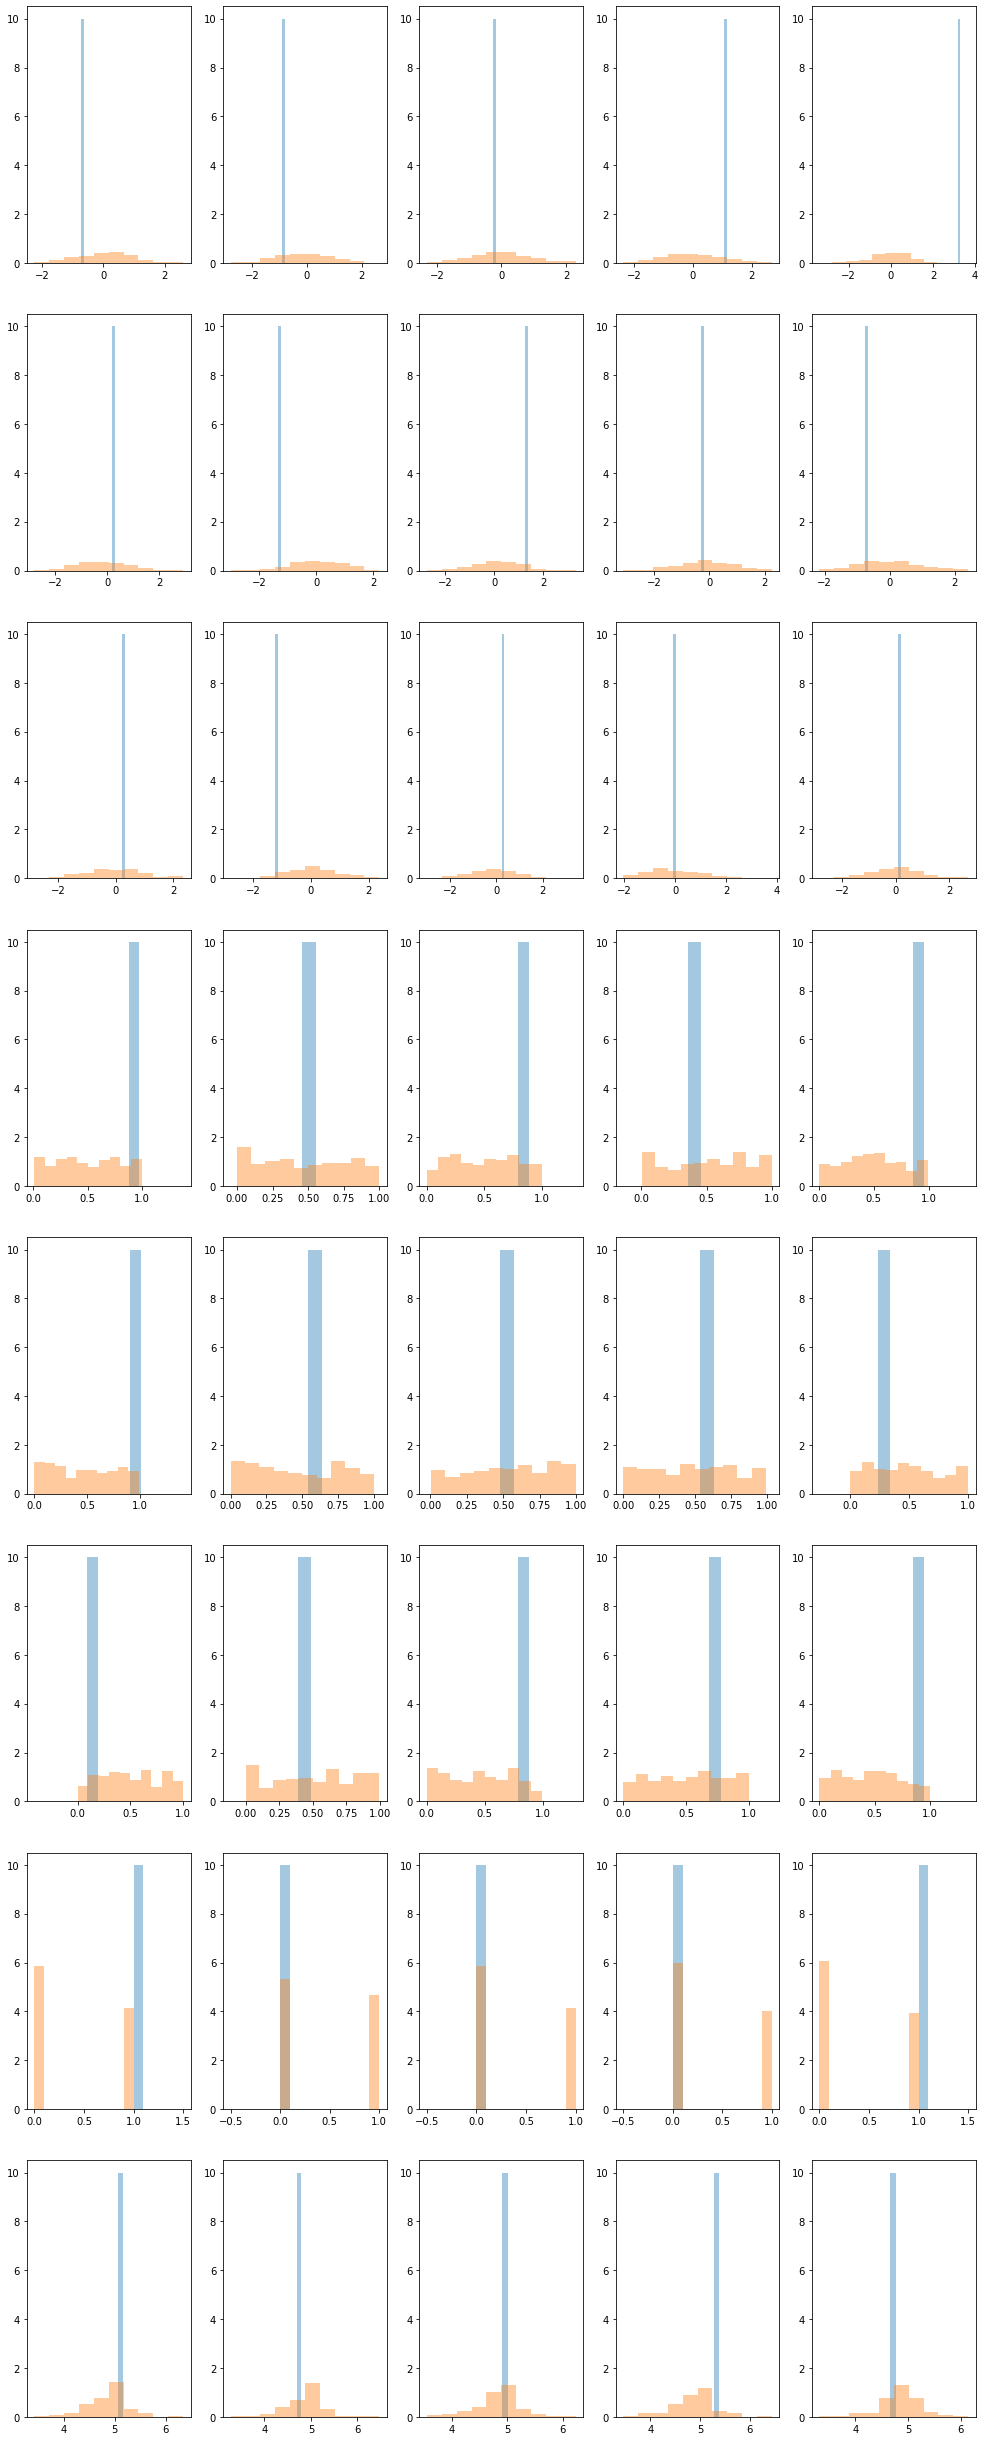

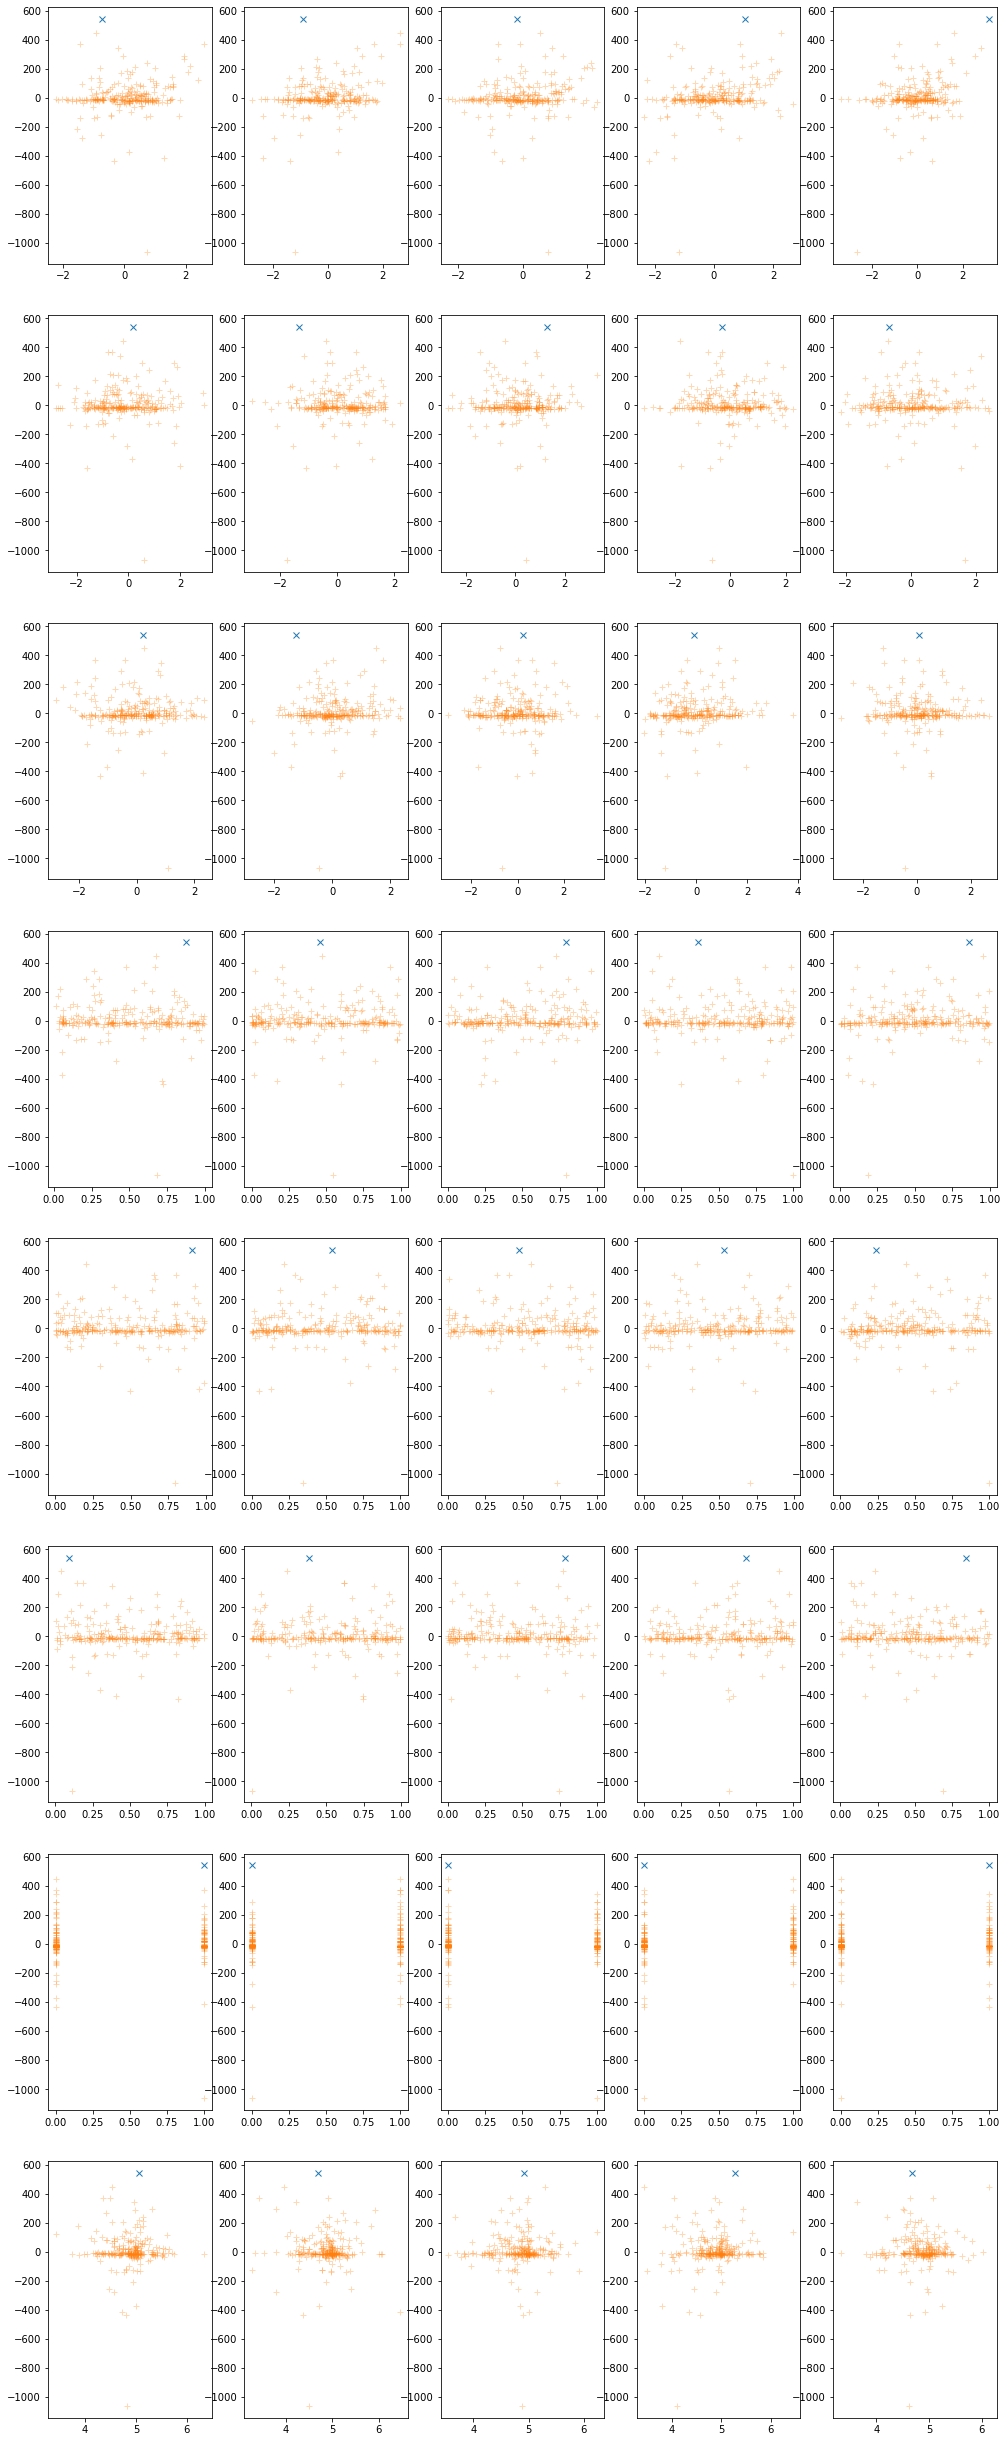

In [51]:
plt.figure(figsize=(17,50))
for i in range(max_CATE_group.shape[1]):
    plt.subplot(9, 5, i+1)
    _=plt.hist(max_CATE_group[:,i],alpha=.4, density=True)
    _=plt.hist(nonmax_CATE_group[:,i],alpha=.4, density=True)
plt.figure(figsize=(17,50))
for i in range(max_CATE_group.shape[1]):
    plt.subplot(9, 5, i+1)
    _=plt.plot(max_CATE_group[:,i], Y_i_star[CATE==max_CATE],"x")
    _=plt.plot(nonmax_CATE_group[:,i], Y_i_star[CATE<max_CATE],"+", alpha=.3)

In [27]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=1.,
    k=2.0,
)

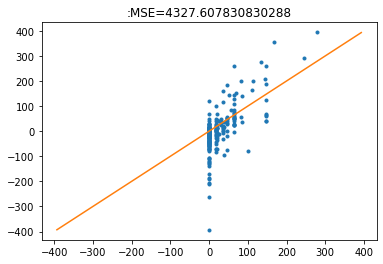

In [28]:
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

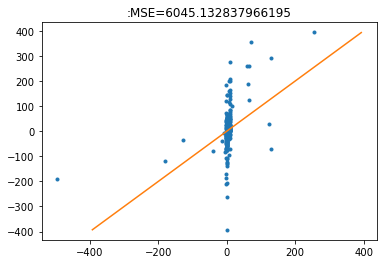

In [29]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=1.,
    k=.1,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

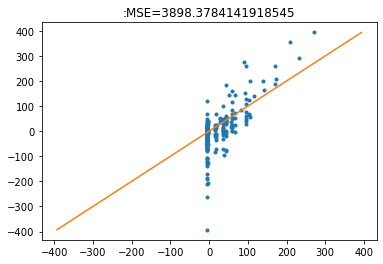

In [30]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=1.5,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

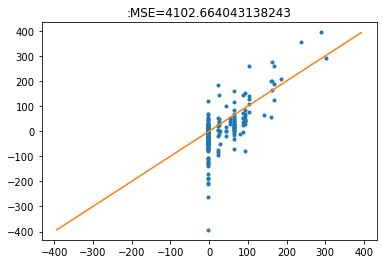

In [31]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=2.,
    k=3.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

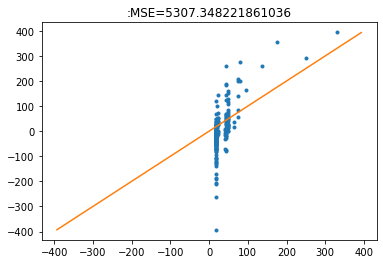

In [33]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=1,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=.5,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

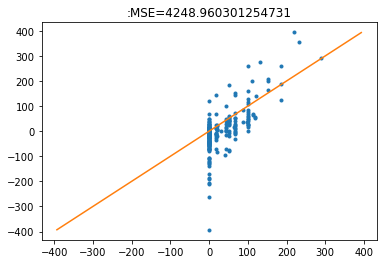

In [34]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=5,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=.5,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

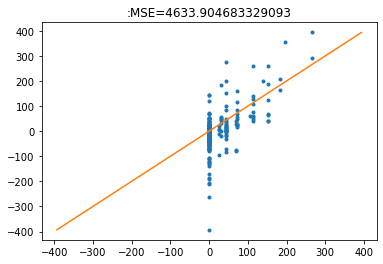

In [35]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=15,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=.25,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

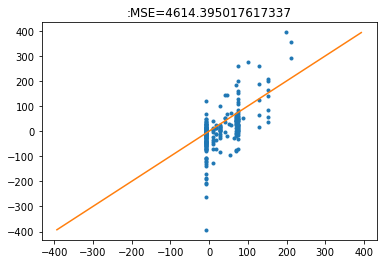

In [36]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=.25,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

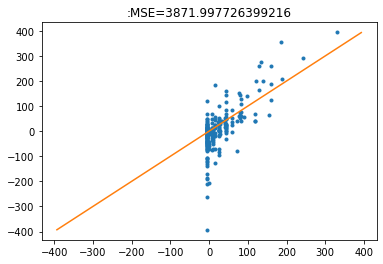

In [37]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=4.,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

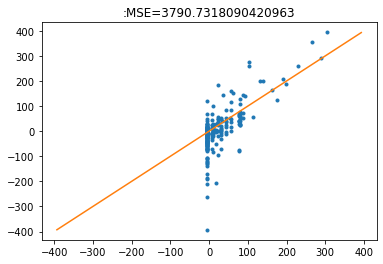

In [38]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=8.,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

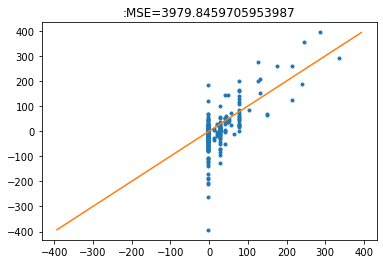

In [39]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=16.,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

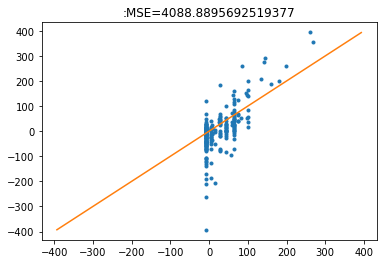

In [40]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=25,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=8.,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

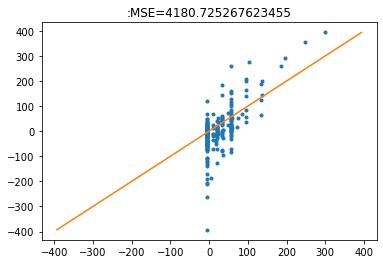

In [41]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=18,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=10.,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

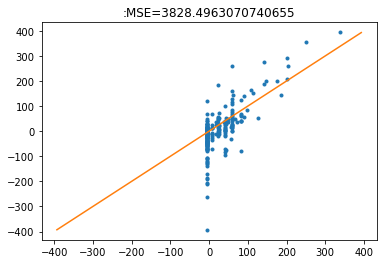

In [42]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=18,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=6.,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

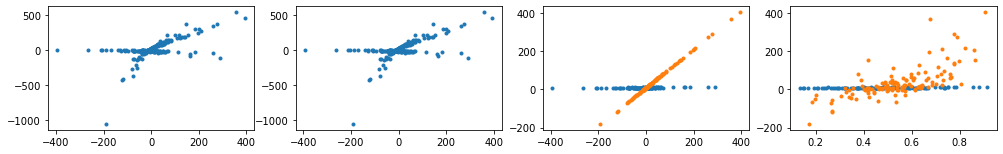

In [9]:
plt.figure(figsize=(17,5))
plt.subplot(2, 4, 1)
plt.plot(tau, Y_i_star,'.')
plt.subplot(2, 4, 2)
plt.plot(tau, Y_i_star,'.')
plt.subplot(2, 4, 3)
plt.plot(tau[W==0], Y[W==0],'.')
plt.plot(tau[W==1], Y[W==1],'.')
plt.subplot(2, 4, 4)

plt.plot(pi[W==0], Y[W==0],'.')
plt.plot(pi[W==1], Y[W==1],'.')


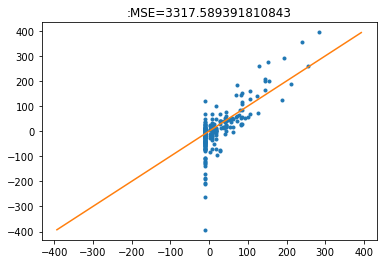

In [6]:
post_samples = sd.get_posterior_samples_data(
    stem="experiment_results/A/known/all_runs_with_ps",
    nreps=1,
    nsamp=2000,
    nburn=2000,
    ntree=17,
    nchain=4,
    thin=.1,
    alpha=0.95,
    beta=8.,
    k=2.,
)
base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
samp_df=pd.DataFrame(post_samples[:,:,0])
CATE=np.mean(post_samples[:,:,0], axis=0)

plt.plot(CATE, tau, '.')
plt.plot(base, base)

plt.title(
    ":MSE="+
    str(np.mean( (CATE-tau)**2))
)
mse_list.append(np.mean( (CATE-tau)**2))

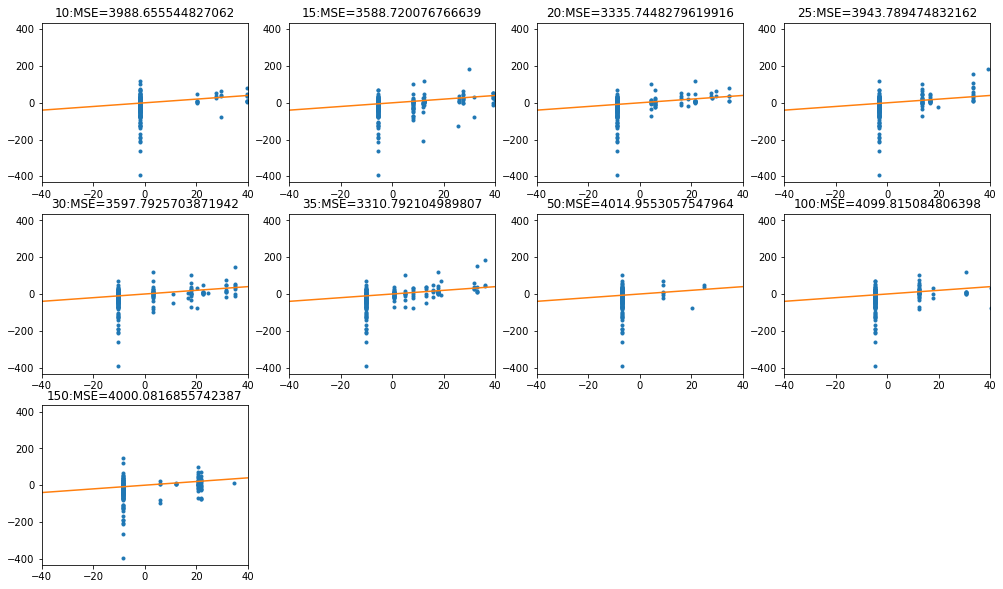

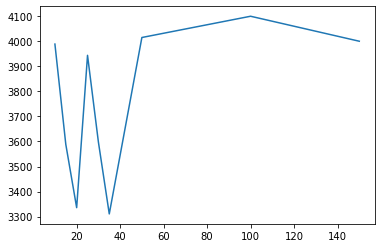

In [14]:
plt.figure(figsize=(17,17))
tree_count = [10,15,20,25,30,35,50,100,150]
mse_list = list()
for i in range(len(tree_count)):
    
    post_samples = sd.get_posterior_samples_data(
        stem="experiment_results/A/known/all_runs_with_ps",
        nreps=1,
        nsamp=2000,
        nburn=2000,
        ntree=tree_count[i],
        nchain=4,
        thin=.1,
        alpha=0.95,
        beta=2.,
        k=2.0,
    )
    
    base = list(range(np.min(tau).astype(int),np.max(tau).astype(int)))
    samp_df=pd.DataFrame(post_samples[:,:,0])
    CATE=np.mean(post_samples[:,:,0], axis=0)
    plt.subplot(5, 4, i+1)
    plt.plot(CATE, tau, '.')
    plt.plot(base, base)
    plt.xlim((-40,40))
    plt.title(
        str(tree_count[i])+
        ":MSE="+
        str(np.mean( (CATE-tau)**2))
    )
    mse_list.append(np.mean( (CATE-tau)**2))
plt.show()
plt.plot(tree_count,mse_list)

In [13]:
'x' in [4,2,3]

False

In [8]:
x

array([1, 2, 3, 4, 5])

In [9]:
y

array([44,  2,  3,  4,  5])